## This is a notebook that use Linear Regression to predict the Cummulative Grade Point


#Import modules


In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Loading the dataset

In [2]:
#Load the data
df = pd.read_excel (r'C:\Users\Dell\Downloads\Y2S1.xlsx', sheet_name='Sheet1')


In [3]:
#Display the first 7 row of data
df.head(7)

,Gender,State,MPU3113,MPU32143,UCCD1013,UCCD1024,UCCD1133,UCCM1363,Semester3_GPA,Semester3_CGPA,Semester1_CGPA
0,Female,Pahang,71,48,73,52,62,67,2.80625,2.820513,2.894545
1,Male,Kedah,68,54,71,76,49,65,2.30000,2.951282,2.969091
2,Male,Malacca,62,66,72,54,71,71,2.86250,3.007692,3.005455
3,Female,Kelantan,78,81,66,82,66,74,3.36250,2.797436,2.872727
4,Male,Perak,77,61,50,51,78,73,2.67500,2.794872,2.892727
5,Male,Johor,65,65,58,61,55,60,3.00000,2.838462,2.725455
6,Female,Negeri Sembilan,66,64,66,70,59,63,2.88750,2.697436,2.823636


In [4]:
#Count the number of rows and columns in the data set
df.shape

(10000, 11)

In [5]:
#Find the column that consist null value
df.isna().sum()

Gender            0
State             0
MPU3113           0
MPU32143          0
UCCD1013          0
UCCD1024          0
UCCD1133          0
UCCM1363          0
Semester3_GPA     2
Semester3_CGPA    7
Semester1_CGPA    7
dtype: int64

In [6]:
#Remove the row that consist of null value
df1=df.dropna()

In [7]:
#Check the if there still any null value
df1.isna().sum()

Gender            0
State             0
MPU3113           0
MPU32143          0
UCCD1013          0
UCCD1024          0
UCCD1133          0
UCCM1363          0
Semester3_GPA     0
Semester3_CGPA    0
Semester1_CGPA    0
dtype: int64

In [8]:
df1.describe()

,MPU3113,MPU32143,UCCD1013,UCCD1024,UCCD1133,UCCM1363,Semester3_GPA,Semester3_CGPA,Semester1_CGPA
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,66.126889,65.907235,65.977184,65.918543,66.006304,65.929451,2.878025,2.871670,2.862161
std,8.498405,8.453867,8.451546,8.386587,8.383310,8.530929,0.301000,0.162987,0.140411
min,43.000000,42.000000,42.000000,42.000000,43.000000,42.000000,1.887500,2.287179,2.080000
25%,60.000000,59.000000,60.000000,60.000000,60.000000,60.000000,2.700000,2.761538,2.770909
50%,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,2.887500,2.874359,2.867273
75%,73.000000,72.000000,72.000000,72.000000,72.000000,72.000000,3.056250,2.989744,2.960000
max,89.000000,89.000000,89.000000,88.000000,89.000000,89.000000,3.700000,3.564103,3.356364


In [9]:
df1.dtypes

Gender             object
State              object
MPU3113             int64
MPU32143            int64
UCCD1013            int64
UCCD1024            int64
UCCD1133            int64
UCCM1363            int64
Semester3_GPA     float64
Semester3_CGPA    float64
Semester1_CGPA    float64
dtype: object

#Exploratory Data Analysis

[Text(0.5, 1.0, 'Year 2 Semester 1 CGPA')]

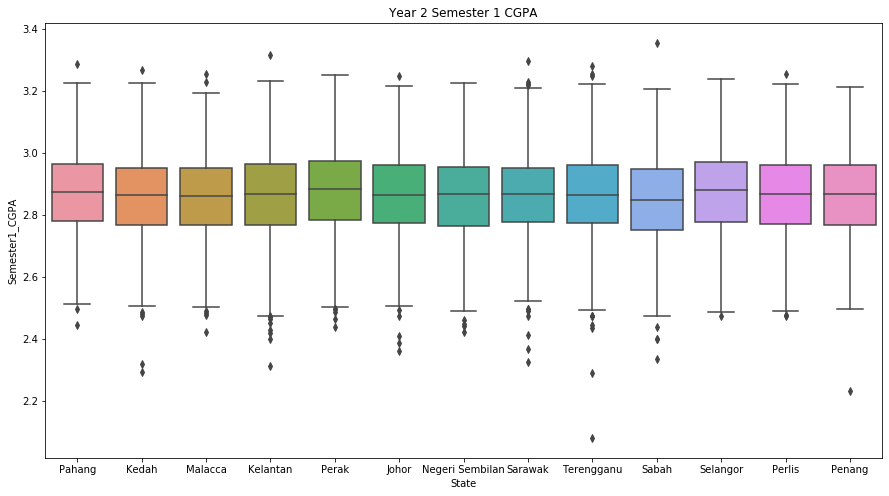

In [10]:
plt.figure(figsize=(15,8))
sns.boxplot(x='State', y='Semester1_CGPA',data=df1).set(title='Year 2 Semester 1 CGPA')

In [11]:
gen =df1[df1['Semester1_CGPA'].between(2.8,3.3)]

In [12]:
#Get a count of the number of each state
gen['State'].value_counts()

Johor              568
Negeri Sembilan    543
Terengganu         542
Kelantan           540
Perlis             538
Selangor           534
Perak              530
Malacca            529
Sarawak            527
Pahang             515
Kedah              509
Sabah              488
Penang             478
Name: State, dtype: int64

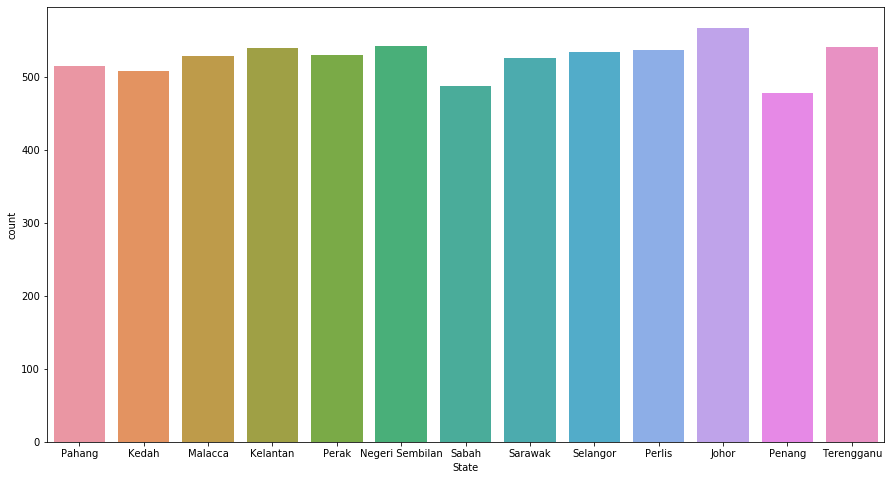

In [13]:
#Visualize the count of Grade
plt.figure(figsize=(15,8))
sns.countplot(gen['State'], label='count')

In [14]:
#Get a count of the number of each Gender
gen['Gender'].value_counts()


Male      3431
Female    3410
Name: Gender, dtype: int64

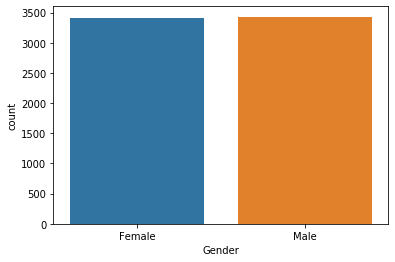

In [15]:
#Visualize the count of Gender
sns.countplot(gen['Gender'], label='count')

#Drop the column that does not related

In [16]:
df1.drop(['Gender','State'], axis='columns', inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df1.shape

(9993, 9)

In [18]:
#Print the data after dropping the columns
df1.head()

,MPU3113,MPU32143,UCCD1013,UCCD1024,UCCD1133,UCCM1363,Semester3_GPA,Semester3_CGPA,Semester1_CGPA
0,71,48,73,52,62,67,2.80625,2.820513,2.894545
1,68,54,71,76,49,65,2.30000,2.951282,2.969091
2,62,66,72,54,71,71,2.86250,3.007692,3.005455
3,78,81,66,82,66,74,3.36250,2.797436,2.872727
4,77,61,50,51,78,73,2.67500,2.794872,2.892727


#Splitting the data

In [19]:
#Split the data set into independent(X) and dependent(Y) data sets
y = df1.iloc[:,-1:]
X = df1.iloc[:,:-1]

In [20]:
#Split the data set into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

#Feature Scaling

In [21]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#Model Training

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print("Accuracy:" ,model.score(X_test, y_test)*100)

Accuracy: 69.77454243902088


In [24]:
prediction = model.predict(X_test)
print(prediction)
print(y_test)

[[2.81505634]
 [2.83383576]
 [2.75600161]
 ...
 [2.78781737]
 [2.63595788]
 [2.8803449 ]]
      Semester1_CGPA
2430        2.725455
802         2.836364
4134        2.709091
7772        2.858182
1546        2.938182
...              ...
235         2.743636
5860        3.089091
1706        2.669091
4417        2.574545
6700        2.992727

[2499 rows x 1 columns]


In [25]:
import pickle 
pickle_out = open("Y2S1.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()